# Introduction to basic charts

In this lesson, we’ll go over the basics of making charts. We’ll primarily be using the library [matplotlib](https://matplotlib.org/), which is specifically used to make data visualizations. Here, we will go over specifically how to make bar charts and scatter plots.

In [1]:
from matplotlib import pyplot as plt

In [2]:
# importing any other necessary libraries below

import numpy as np
import pandas as pd

### Getting started and making basic charts with matplotlib

#### Step 1: Importing the dataset for your visualizations

Let's import the <a href="https://iranopendata.org/en/dataset/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202">crude birth rate, death rate and child mortality rate in selected countries of the world</a> from Iran Open Data, Iran's open data portal. This specific dataset has raw birth, death and child mortality rates from different countries in 2020. 

If you want to download the dataset directly, you can also access the dataset from <a href="https://raw.githubusercontent.com/ICFJ-Computational-Journaism/datasets/main/csv/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv">this github link.</a>

In [4]:
# import the dataset below - make sure that if you're not importing from a URL that you first 
# upload the raw dataset to jupyter notebook

# import dataset as a 'dataframe' (df) to analyze in python
url = "https://raw.githubusercontent.com/ICFJ-Computational-Journaism/datasets/main/csv/iod-03222-crude-birth-rate-death-rate-child-mortality-rate-in-selected-countries-world-202-en.csv" 
df = pd.read_csv(url)

Let's take a look at this dataset. What <strong>variables/columns</strong> are we working with?

#### Step 2: Cleaning your dataset

Sometimes you will be lucky and have a clean dataset that you can immediately start visualizing. But more often than not, you will have to clean your dataset. Cleaning involves "fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset" (<a href="https://www.tableau.com/learn/articles/what-is-data-cleaning">Tableau</a>).

In [5]:
# let's look at the first 10 rows of this dataset

df.head(10)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births
0,asia,17,7,27.0
1,"Azerbaijan, Republic of - Asia",14,6,11.0
2,Jordan - Asia,22,4,17.0
3,Armenia - Asia,12,9,6.0
4,Uzbekistan - Asia,23,5,11.0
5,Afghanistan - Asia,33,6,50.0
6,United Arab Emirates - Asia,11,1,6.0
7,Indonesia - Asia,18,7,25.0
8,"Iran, Islamic Republic - Asia",17,5,6.0
9,Bahrain - Asia,14,2,6.0


In [6]:
# let's also look at the last 10 rows of this dataset

df.tail(10)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births
77,Europe - France,11,9,3.6
78,Europe - Finland,8,10,2.1
79,Europe - Poland,10,11,3.7
80,Europe - Hungary,9,13,3.8
81,Europe - Norway,10,8,2.1
82,Europe - Netherlands,10,9,3.5
83,Europe - Greece,8,11,3.5
84,Oceania,17,7,16.0
85,Oceania - Australia,13,6,3.1
86,Oceania - New Zealand - New Zealand,12,7,4.5


We notice that in the first column 'Region and country - Asia' that most rows have either the country (i.e. Indonesia, 'Iran, Islamic Republic') or the region (i.e. Europe, Asia) and a dash separating the two.  

However, there are issues. Some rows have the country first, then the region. Other rows have the region first, then the country. Additionally, some rows are the average rates for an entire region (i.e. Oceania in row 84).

Let us add three new columns to the dataframe (it would be two columns, but some rows have multiple dashes due to error). We will split the columns based on the dash '-'.

In [7]:
df[['Region','Country', 'Misc']] = df['Region and country - Asia'].str.split(" - ",expand=True)

In [8]:
# Now let's take a look at the first 40 rows of the dataset with the three new columns 
# which was created from splitting the original 'Region and country - Asia' column

df.head(40)

,Region and country - Asia,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Region,Country,Misc
0,asia,17,7,27.0,asia,None,None
1,"Azerbaijan, Republic of - Asia",14,6,11.0,"Azerbaijan, Republic of",Asia,None
2,Jordan - Asia,22,4,17.0,Jordan,Asia,None
3,Armenia - Asia,12,9,6.0,Armenia,Asia,None
4,Uzbekistan - Asia,23,5,11.0,Uzbekistan,Asia,None
5,Afghanistan - Asia,33,6,50.0,Afghanistan,Asia,None
6,United Arab Emirates - Asia,11,1,6.0,United Arab Emirates,Asia,None
7,Indonesia - Asia,18,7,25.0,Indonesia,Asia,None
8,"Iran, Islamic Republic - Asia",17,5,6.0,"Iran, Islamic Republic",Asia,None
9,Bahrain - Asia,14,2,6.0,Bahrain,Asia,None


Let's convert column values to strings: 'Region', 'Country', 'Misc'. The function [`astype()`](https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/) changes data format/type.

In [9]:
df['Region'] = df['Region'].astype(str) 
df['Country'] = df['Country'].astype(str) 
df['Misc'] = df['Misc'].astype(str) 

Now, let's filter the main dataframe to create separate dataframes separated by 'Region'.

In [10]:
asia_df = df.loc[df['Country'] == 'Asia']
# to check #asia_df

# for asia_df, we will need to switch the 'Region' and 'Country' columns
asia_df = asia_df.rename(columns={'Region': 'Country', 'Country': 'Region'})

# asia_df.head(3) # to check the first three rows of our newly created asia_df

In [11]:
africa_df = df.loc[df['Region'] == 'Africa']
# africa_df.head(3) # to check the first three rows of our newly created africa_df

In [12]:
europe_df = df.loc[df['Region'] == 'Europe']
# europe_df.head(3) # to check the first three rows of our newly created europe_df

In [13]:
oceania_df = df.loc[df['Region'] == 'Oceania']
# oceania_df.head(3) # to check the first three rows of our newly created oceania_df

In [14]:
latinamerica_df = df.loc[df['Region'] == 'Latin America and the Caribbean']
# latinamerica_df.head(3) # to check the first three rows of our newly created latinamerica_df

In [15]:
northamerica_df = df.loc[df['Region'] == 'North America']
# northamerica_df.head(3) # to check the first three rows of our newly created northamerica_df

In [16]:
southamerica_df = df.loc[df['Region'] == 'South America']
# southamerica_df.head(3) # to check the first three rows of our newly created southamerica_df

Now let's check that the length of the original dataframe, 87 rows, matches the lengths of the dataframes (filtered by region) combined.

In [17]:
len(asia_df)+len(africa_df)+len(europe_df)+len(oceania_df)+len(northamerica_df)+len(southamerica_df)+len(latinamerica_df)

85

Since the 'Country' and 'Region' columns are correctly assigned now, we can join these regional dataframes.

In [18]:
world_df = pd.concat([asia_df, africa_df, europe_df, oceania_df, latinamerica_df, northamerica_df, southamerica_df], axis=0)
# make sure to check what it looks like! 

Let's drop the original column that had both Region and Country, as well as the 'Misc' column we created to catch any extra unnecessary data from splitting the original column into separate Region and Country columns. After this, we will have a cleaned dataset that is ready to be visualized!

In [19]:
# drop first column that has both Region and Country and the 'Misc' column

world_df_edited = world_df.drop(['Region and country - Asia', 'Misc'], axis=1)
world_df_edited.head(5)

,Crude birth rate - per thousand population,Crude death rate - per thousand population,Child mortality rate is less than - One year - per thousand live births,Country,Region
1,14,6,11.0,"Azerbaijan, Republic of",Asia
2,22,4,17.0,Jordan,Asia
3,12,9,6.0,Armenia,Asia
4,23,5,11.0,Uzbekistan,Asia
5,33,6,50.0,Afghanistan,Asia


#### Step 3: Visualizing the data

Now we can use the matplotlib library we imported at the very beginning to visualize data from our cleaned dataframe (world_df_edited). Let's make **bar charts** and **scatterplots.**

Bar charts are generally good for comparing data in one category (*grouped* bar charts are good for if you want to compare data from *more* than one category). 

Let's create a bar chart to compare *just* **crude birth rates** among different **countries in Asia.** 

##### Making a bar chart with matplotlib

Note: Remember that you imported matplotlib.pyplot as `plt` in the beginning: `from matplotlib import pyplot as plt`

The basic format to create a bar chart using matplotlib is the following:
`plt.bar(x, height, width, bottom, align)`

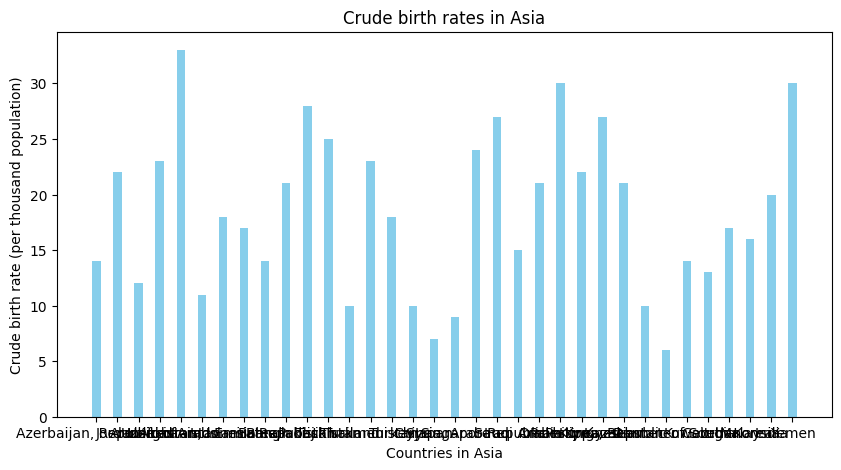

In [20]:
## bar charts are one type of basic visualization you can create using matplotlib

# we created a separate dataframe for data from countries in Asia, so we will use this

# the 'x' value in this case would be what is on the x-axis: names of the different countries
bar_x_asia = asia_df['Country']

# the 'height' value in this case would be what influences the height of the bars: the crude birth rates of these countries
bar_y_asia = asia_df['Crude birth rate - per thousand population']
  
# now set the size you want your bar chart to be in inches
# in this case, we have the bar chart set to 10 by 5 inches
fig = plt.figure(figsize = (10, 5))
 
# this will actually create the bar chart itself with the data we want
# set this bar chart to what color you want the bar to be
# and the bar's width
plt.bar(bar_x_asia, bar_y_asia, color ='skyblue', width = 0.4)
 
# you can also set the chart title, along with the x and y-axis labels - this is generally good practice to describe what your chart is showing
plt.xlabel("Countries in Asia")
plt.ylabel("Crude birth rate (per thousand population)")
plt.title("Crude birth rates in Asia")
plt.show()

You may notice that the x-axis is quite unreadable - this is because there are too many countries displayed.


One solution we could try is switching this bar chart from vertical to **horizontal**. We can do this by using the command [`plt.barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) instead of `plt.bar()`.

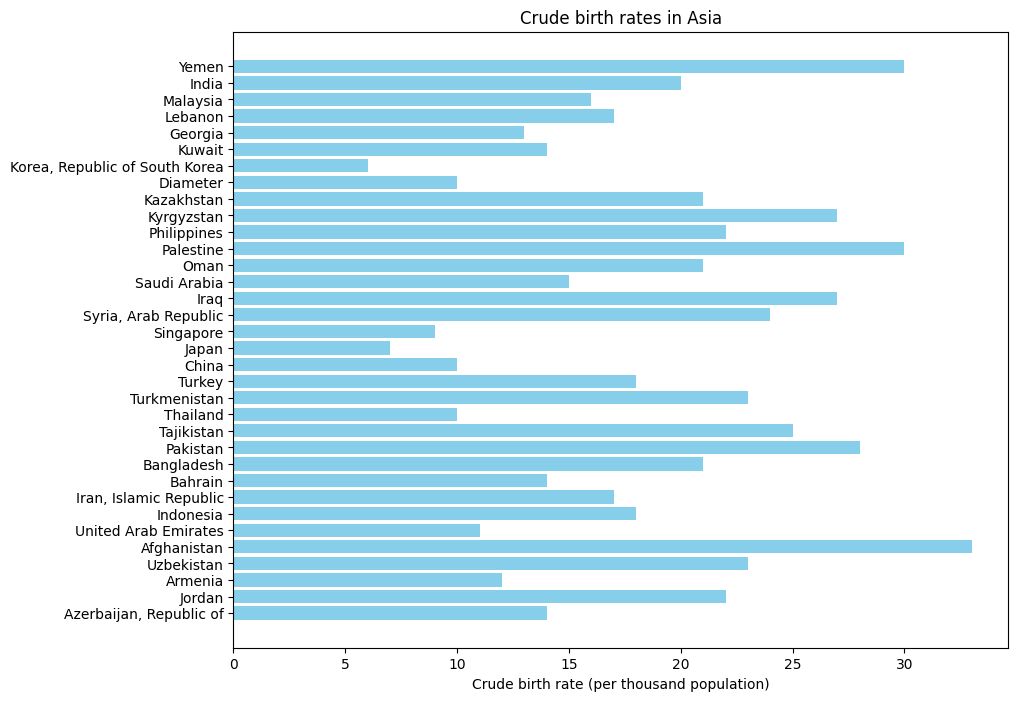

In [25]:
# setting the dimensions
fig = plt.figure(figsize = (10, 8))

# plotting the actual horizontal bar chart
plt.barh(bar_x_asia, bar_y_asia, color ='skyblue')

# putting axes labels and a title
plt.xlabel("Crude birth rate (per thousand population)")
plt.title("Crude birth rates in Asia")
plt.show()

Now there is a lot more space to discern which bar (representing crude birth rate) corresponds with which country.

Bar charts like these are especially helpful for drawing general conclusions from datasets. From this bar chart, we can see that compared to its geographic neighbors, Iran had one of the *lowest* crude birth rates in 2020.

##### Making a scatterplot with matplotlib

`matplotlib` can also be used to make scatterplots. Scatterplots are generally used to compare two different *numeric** variables.

The general format of a matplotlib scatterplot is:
`plt.scatter(x, y)`, where matplotlib.pyplot is imported as `plt`. It takes x and y-values.

We can try making a scatterplot comparing the crude birth rates and death rates among countries in Asia.

In [28]:
# the x-values will be scatter_x_asia, the variable we are creating for our scatter plot
# that represents the crude birth rates from these same countries
scatter_x_asia = asia_df['Crude birth rate - per thousand population']

In [29]:
# the y-values in this case would be scatter_y_asia
# the crude death rates of these countries
scatter_y_asia = asia_df['Crude death rate - per thousand population']

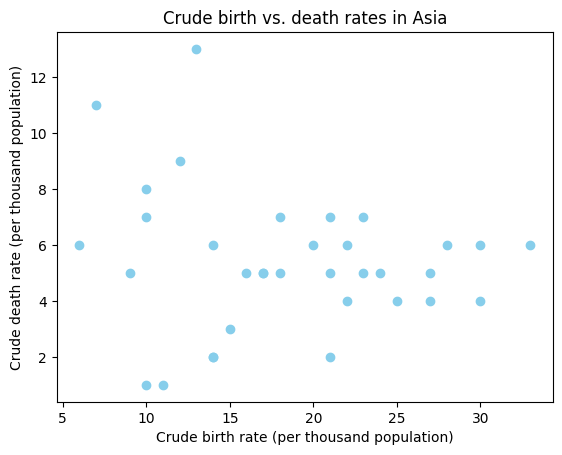

In [30]:
# now that we have the specific data, let's plot these data points

# passing this data to the scatter plot
plt.scatter(scatter_x_asia, scatter_y_asia, color='skyblue')
 
# setting the chart title, along with the x and y-axis labels
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")
plt.show()

It's important to note the scale differences between axes when drawing conclusions from these charts. In this scatterplot, the scales on the x and y axes are different - the range of crude birth rates goes up past 30 while the range in crude death rates only goes up to 9. 

Let's try re-creating this scatterplot with both the x and y-axes having **the same scale.**

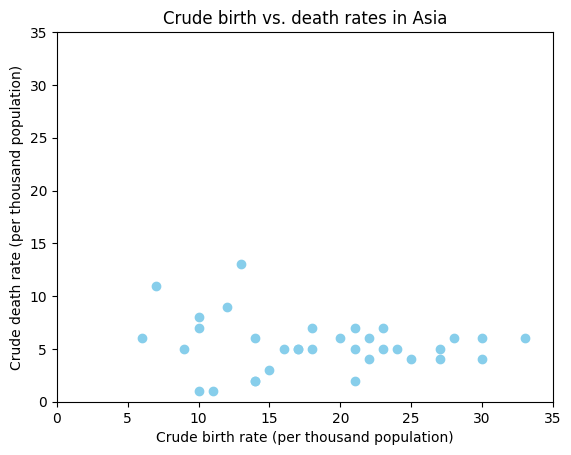

In [31]:
plt.scatter(scatter_x_asia, scatter_y_asia, color='skyblue')

# setting the x and y axes to be the same scale
plt.xlim(0, 35)
plt.ylim(0, 35)
 
plt.xlabel("Crude birth rate (per thousand population)")
plt.ylabel("Crude death rate (per thousand population)")
plt.title("Crude birth vs. death rates in Asia")
plt.show()

When we plot the birth and death rates in this way, we can better observe how crude birth rates across most countries in Asia are much higher than their crude death rates.

### Additional exercises

Try creating your **own** bar and scatter plots with the other dataframes you created in this lesson, such as `africa_df` or `oceania_df`. If you make your own bar chart, you could try coloring the bars according to region (i.e. Africa, Oceania, Asia etc.), or try creating a [grouped bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)!

### Additional resources

* Explore more about the [matplotlib Python library](https://matplotlib.org/)
* Using the pandas [rename()](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function



### Congrats on finishing your first lesson on basic chart creation! 

In the next lesson, we'll try adding text annotations to the scatterplot we made in this lesson. 